STATISTICS - ML

#06 January 2020 - Statistics ~

In [1]:
import pandas as pd
import math
import statistics
import numpy as np
import scipy.stats
kulelah=pd.read_excel('./Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [2]:
#hapus kolom ga penting
kulelah.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)
kulelah.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [3]:
#ganti nama kolomnya
kulelah.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
kulelah.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [4]:
kulelah.columns.values

array(['Country', 'Continent', 'Region', 'DevName', 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

Case:
1. Descriptive statistics untuk setiap negara
2. Descriptive statistics untuk setiap region
3. Descriptive statitsics untuk setiap area

In [5]:
# Descriptive per negara
kulelah

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59


In [6]:
kulelah.columns.values

array(['Country', 'Continent', 'Region', 'DevName', 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

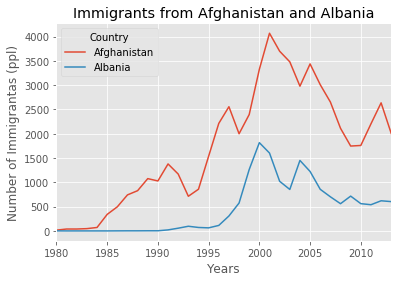

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use(['ggplot'])
nyoba_lagi = kulelah.copy()
nyoba_lagi=nyoba_lagi.set_index('Country')
years = list(range(1980,2014))
Jwb = nyoba_lagi.loc[['Afghanistan','Albania'],years]
Jwb_satu = Jwb.transpose ()
Jwb_satu.plot(kind='line')
plt.title('Immigrants from Afghanistan and Albania')
plt.ylabel('Number of Immigrantas (ppl)')
plt.xlabel('Years')
plt.show()

In [8]:
country = kulelah.copy()
country_total = country.groupby('Country',axis=0)[years].sum()
country_total['total'] = country_total[years].sum(axis=1)
#country_total.sort_values(by='total',ascending=False,inplace=True)
country_total
#pie = raw.copy()
#bar_bor = pie.groupby('borough',axis=0).sum()
#bar_bor.sort_values(by='value',ascending=True,inplace=True)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,1,2,1,6,0,18,7,12,7,18,...,161,140,122,133,128,211,160,174,217,2985


In [9]:
#Descriptive Satatistics per country
hmm = pd.DataFrame(group.describe().rename(columns={'score':area}).squeeze()
                  for area, group in country_total.groupby('Country')['total'])
hmm

,count,mean,std,min,25%,50%,75%,max
0,1.0,58639.0,NaN,58639.0,58639.0,58639.0,58639.0,58639.0
1,1.0,15699.0,NaN,15699.0,15699.0,15699.0,15699.0,15699.0
2,1.0,69439.0,NaN,69439.0,69439.0,69439.0,69439.0,69439.0
3,1.0,6.0,NaN,6.0,6.0,6.0,6.0,6.0
4,1.0,15.0,NaN,15.0,15.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...
190,1.0,97146.0,NaN,97146.0,97146.0,97146.0,97146.0,97146.0
191,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
192,1.0,2985.0,NaN,2985.0,2985.0,2985.0,2985.0,2985.0
193,1.0,1677.0,NaN,1677.0,1677.0,1677.0,1677.0,1677.0


In [10]:
for x in country_total.index:
    print('Country:',x)
    print('ave',country_total.loc[x].mean())
    print('min',country_total.loc[x].min())
    print('max',country_total.loc[x].max())
    print('med',country_total.loc[x].median())
    print('skew',country_total.loc[x].skew())
    print('kurt',country_total.loc[x].kurtosis())

Country: Afghanistan
ave 3350.8
min 16
max 58639
med 1758.0
skew 5.777682541377004
kurt 33.87868257722366
Country: Albania
ave 897.0857142857143
min 0
max 15699
med 307.0
skew 5.550037843361953
kurt 31.991651061982186
Country: Algeria
ave 3967.942857142857
min 44
max 69439
med 2054.0
skew 5.702521848078597
kurt 33.26872840126962
Country: American Samoa
ave 0.34285714285714286
min 0
max 6
med 0.0
skew 4.555766100664353
kurt 23.0554223226261
Country: Andorra
ave 0.8571428571428571
min 0
max 15
med 0.0
skew 5.138067416782207
kurt 28.44406030866516
Country: Angola
ave 120.74285714285715
min 1
max 2113
med 38.0
skew 5.511399871277085
kurt 31.615194289742643
Country: Antigua and Barbuda
ave 56.05714285714286
min 0
max 981
med 27.0
skew 5.806895242813195
kurt 34.11494051122845
Country: Argentina
ave 1119.7714285714285
min 196
max 19596
med 459.0
skew 5.79886740026177
kurt 34.03077799457014
Country: Armenia
ave 189.14285714285714
min 0
max 3310
med 89.0
skew 5.64946120932542
kurt 32.8348066727

ave 137.94285714285715
min 0
max 2414
med 74.0
skew 5.683728692219031
kurt 33.108991314314814
Country: Luxembourg
ave 12.285714285714286
min 1
max 215
med 6.0
skew 5.779032269307121
kurt 33.877837146917145
Country: Madagascar
ave 125.37142857142857
min 10
max 2194
med 42.0
skew 5.7077027487022
kurt 33.27628242952401
Country: Malawi
ave 16.8
min 0
max 294
med 7.0
skew 5.774663148496822
kurt 33.835583755504686
Country: Malaysia
ave 1395.2571428571428
min 204
max 24417
med 580.0
skew 5.765571954342571
kurt 33.750018886877264
Country: Maldives
ave 1.7142857142857142
min 0
max 30
med 0.0
skew 5.187992091548263
kurt 28.744556523417945
Country: Mali
ave 125.02857142857142
min 3
max 2188
med 51.0
skew 5.662168777812413
kurt 32.92223012687743
Country: Malta
ave 88.34285714285714
min 4
max 1546
med 24.0
skew 5.534387285759775
kurt 31.767958432415828
Country: Marshall Islands
ave 0.11428571428571428
min 0
max 2
med 0.0
skew 3.988864344933083
kurt 14.75206611570248
Country: Mauritania
ave 58.05714

In [11]:
#install seaborn

In [12]:
ct = country.copy()
ctt = ct.groupby('Country',axis=0)[years].sum()
#ctt.loc[:,'Total']=ctt.sum(axis=1)
ctt.loc['Total',:]=ctt.sum(axis=0)
ctt

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
Albania,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
Algeria,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,...,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
American Samoa,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,1.0,2.0,1.0,6.0,0.0,18.0,7.0,12.0,7.0,18.0,...,124.0,161.0,140.0,122.0,133.0,128.0,211.0,160.0,174.0,217.0
Zambia,11.0,17.0,11.0,7.0,16.0,9.0,15.0,23.0,44.0,68.0,...,56.0,91.0,77.0,71.0,64.0,60.0,102.0,69.0,46.0,59.0


In [13]:
hm = ctt.loc[ 'Total' , : ]
hm

1980     99137.0
1981    110563.0
1982    104271.0
1983     75550.0
1984     73417.0
1985     69978.0
1986     86048.0
1987    134771.0
1988    139306.0
1989    164432.0
1990    188054.0
1991    207509.0
1992    221687.0
1993    222049.0
1994    193665.0
1995    187712.0
1996    200085.0
1997    192885.0
1998    160727.0
1999    179818.0
2000    216712.0
2001    242643.0
2002    223111.0
2003    217297.0
2004    232083.0
2005    257457.0
2006    247057.0
2007    232405.0
2008    243047.0
2009    248768.0
2010    276956.0
2011    246194.0
2012    256222.0
2013    257537.0
Name: Total, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


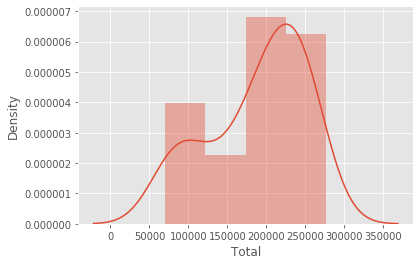

In [14]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.distplot(hm)

#08 January 2021 - Machine Learning

Case: memprediksi sale price rumah di tiap borough yang menggunakan feature residential unit, commercial, land square feet, 
    and gross square feet for Brooklyn 

In [15]:
pip install scikit-learn

You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import math
import statistics
import numpy as np
import scipy.stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# Load your dataset here
df=pd.read_csv('./nyc-rolling-sales.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [29]:
#EDA

df.drop(['Unnamed: 0', 'EASE-MENT'],axis=1,inplace=True)
numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

#print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
#print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])
df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


In [39]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [31]:
case=df.set_index('BOROUGH')
case

#Brooklyn Housing Sale Price's Prediction
res = np.array(df[df['BOROUGH']==3]['RESIDENTIAL UNITS'].dropna()).reshape(-1,1)
comm = np.array(df[df['BOROUGH']==3]['COMMERCIAL UNITS'].dropna()).reshape(-1,1)
land = np.array(df[df['BOROUGH']==3]['LAND SQUARE FEET'].dropna()).reshape(-1,1)
gross = np.array(df[df['BOROUGH']==3]['GROSS SQUARE FEET'].dropna()).reshape(-1,1)
sale_price = np.array(df[df['BOROUGH']==3]['SALE PRICE'].dropna()).reshape(-1,1)
ba = np.concatenate((res, comm), axis=1)
ca = np.concatenate((res, comm,land), axis=1)
ha = np.concatenate((res, comm,land,gross), axis=1)

price_model_0 = LinearRegression().fit(res,sale_price)
price_model_1 = LinearRegression().fit(ba,sale_price)
price_model_2 = LinearRegression().fit(ca,sale_price)
price_model_3 = LinearRegression().fit(ha,sale_price)

In [60]:
np.shape(res)

(23843, 1)

In [59]:
np.shape(ha)

(23843, 4)

In [70]:
performance_0 = price_model_0.score(res,sale_price)
performance_1 = price_model_1.score(ba,sale_price)
performance_2 = price_model_2.score(ca,sale_price)
performance_3 = price_model_3.score(ha,sale_price)

performance_0,performance_1,performance_2,performance_3

(0.007820050355224817,
 0.009384203017623327,
 0.032467013520968147,
 0.05278288843147527)

In [71]:
sale_house_pred_0=price_model_0.predict(res)
sale_house_pred_1=price_model_1.predict(ba)
sale_house_pred_2=price_model_2.predict(ca)
sale_house_pred_3=price_model_3.predict(ha)

In [81]:
error_0 = np.mean(sale_house_pred_0-sale_price)**2
error_1 = np.mean(sale_house_pred_1-sale_price)**2
error_2 = np.mean(sale_house_pred_2-sale_price)**2
error_3 = np.mean(sale_house_pred_3-sale_price)**2
error_0, error_1, error_2, error_3 #Jelek hasilnya T.T

(9.99904201443572e-21,
 1.3223733064091239e-20,
 6.249401259022326e-24,
 1.224882646768376e-21)

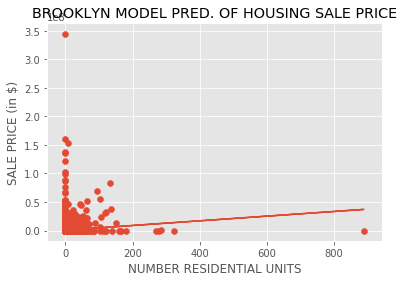

In [79]:
plt.plot(res,sale_house_pred)
plt.scatter(res,sale_price)
plt.title('BROOKLYN MODEL PRED. OF HOUSING SALE PRICE')
plt.ylabel('SALE PRICE (in \$)')
plt.xlabel('NUMBER RESIDENTIAL UNITS')
plt.show()

In [3]:
df_heart=pd.read_csv('./heart.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df_heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
chol = np.array(df_heart['chol']).reshape(-1,1)
jant = np.array(df_heart['target']).reshape(-1,1)
print(chol,jant)
#np.array(df[df['BOROUGH']==3]['RESIDENTIAL UNITS'].dropna()).reshape(-1,1)

[[212]
 [203]
 [174]
 ...
 [275]
 [254]
 [188]] [[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [13]:
model= LogisticRegression(solver='liblinear')

In [15]:
model.fit(chol,jant)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(solver='liblinear')

In [16]:
model.classes_

array([0, 1])

In [18]:
print(model.intercept_, model.coef_)

[0.93434372] [[-0.00359924]]


In [19]:
model.predict_proba(chol)

array([[0.45727817, 0.54272183],
       [0.44925082, 0.55074918],
       [0.42358441, 0.57641559],
       ...,
       [0.51385822, 0.48614178],
       [0.49496593, 0.50503407],
       [0.43593244, 0.56406756]])

In [20]:
model.predict(chol)

array([1, 1, 1, ..., 0, 1, 1])

In [21]:
model.score(chol,jant)

0.5619512195121952

In [22]:
confusion_matrix(jant,model.predict(chol))

array([[207, 292],
       [157, 369]])

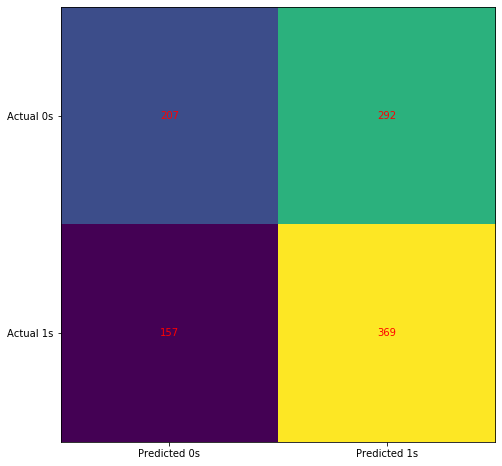

In [24]:
#Plot
cm = confusion_matrix(jant, model.predict(chol))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color = 'red')
plt.show()

In [26]:
print(classification_report(jant,model.predict(chol)))

              precision    recall  f1-score   support

           0       0.57      0.41      0.48       499
           1       0.56      0.70      0.62       526

    accuracy                           0.56      1025
   macro avg       0.56      0.56      0.55      1025
weighted avg       0.56      0.56      0.55      1025



In [ ]:
model_imp=LogisticRegression(solver='liblinear')